In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from copy import copy as copy

# Vagues scélérates et l'équation non-linéaire de Schrödinger
Nous voulons avec ce projet, obtenier une approximation des ondes scélérates. Celles-ci pouvant être obtenues avec l'amplitude de l'équation de Schrödinger non-linéaire, qui correspond à une fonction d'onde complexe $\psi$(x,t):
$$i\frac{\partial \psi}{\partial t}= -\frac{1}{2}\frac{\partial ^2\psi}{\partial x^2}+ K|\psi|^2\psi$$

In [2]:
def schrodinger(K, a, Ti = 0, T = 200, N = 1024, L = 40, dt = 0.01):
    temps = np.arange(0, T, dt)
    x = np.linspace(-L/2 + L/N, L/2, N+1)
    m = np.linspace(-N/2, N/2, N+1)
    p = np.zeros((len(x), len(temps)), dtype="complex")
    p[:,0] = 0.5 + 0.01*np.cos(2*np.pi*x/L)

    for i, t in enumerate(temps[:-1]):
        g = np.exp(-1j*K*dt*np.abs(p[:, i])**2)*p[:, i]
        g_m = (1/N)*np.fft.fftshift(np.fft.fft(g))
        p_m = np.exp(dt*(-1j/2)*(2*m*np.pi/L)**2)*g_m
        p[:, i+1] = N*np.fft.ifft(np.fft.ifftshift(p_m))

    if a == 0:
        u, v = np.meshgrid(x, temps)
        c = np.linspace(np.min(np.min(np.abs(p))), np.max(np.max(np.abs(p))), 101)
        plt.contourf(u, v, np.abs(np.transpose(p)), c, cmap = 'jet')

        plt.xlabel('x')
        plt.ylabel('t')
        plt.title("amplitude de psi(x, t) pour K = {}".format(K))
        plt.colorbar()
        plt.show()
        
    if a == 1:
        fig, ax =plt.subplots()
        fig.suptitle("Graphes de l'amplitude de psi(x,t), à des intervalles de temps, avec K = {}".format(K))
        ax.plot(x, np.abs(p[:, int(0/dt)]), c ='k', label = "Amplitude au temps 0")
        ax.plot(x, np.abs(p[:, int(25/dt)]), c ='m', label = "Amplitude au temps 25")
        ax.plot(x, np.abs(p[:, int(50/dt)]), c ='y', label = "Amplitude au temps 50")
        ax.plot(x, np.abs(p[:, int(75/dt)]), c ='g', label = "Amplitude au temps 75")
        ax.plot(x, np.abs(p[:, int(100/dt)]), c ='b', label = "Amplitude au temps 100")
        plt.legend(['t = 0', 't = 25', 't = 50', 't = 75', 't = 100'], loc ='upper left')
        plt.xlabel('x')
        plt.ylabel('amplitude de psi(x,t)')
        
    if a ==2:
        plt.title("Graphe de l'amplitude de psi(x,{}) avec K = -1".format(Ti))
        plt.plot(x, np.abs(p[:, int(Ti/dt)]), c ='k', label = "Amplitude au temps {}".format(Ti))
        plt.xlabel('x')
        plt.ylabel('aplitude de psi(x, {})'.format(Ti))

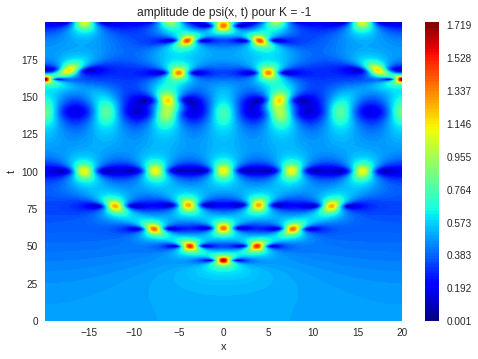

In [4]:
schrodinger(-1, 0)

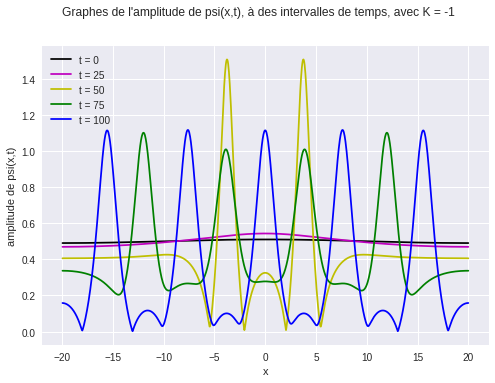

In [6]:
schrodinger(-1, 1)

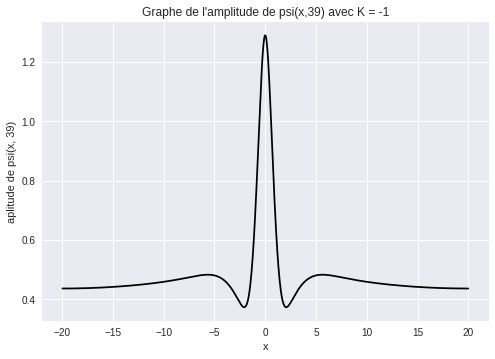

In [7]:
schrodinger(-1, 2, 39)

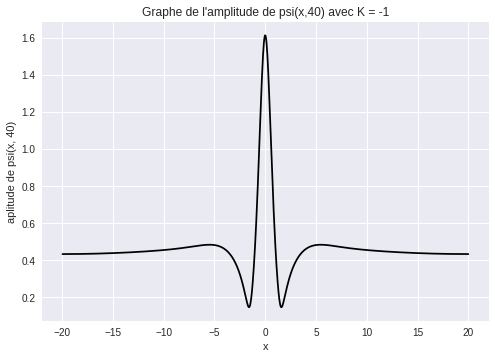

In [8]:
schrodinger(-1, 2, 40)

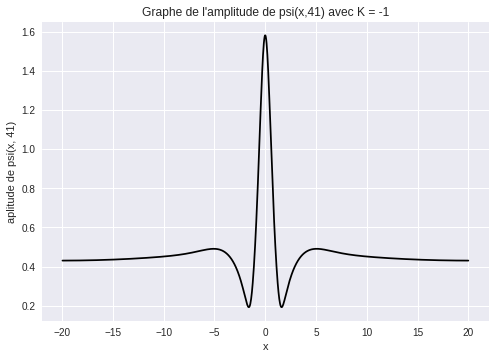

In [9]:
schrodinger(-1, 2, 41)

Nous constatons qu'initialement, l'amplitude psi(x,t) est très faible et varie symétriquement le long de l'axe des x. Cependant aux alentours de t = 40, nous obtenons un maximum pour x = 0, comme nous le voyons dans le troisième graphe. Ensuite, ce pic disparait assez rapidement, seulement pour plus tard, aux alentours de t = 50, réapparaître en deux maxima symétriques par rapport à x = 0. Et ainsi de suite, nous observons une propagation des maxima, montré au deuxième graphe.

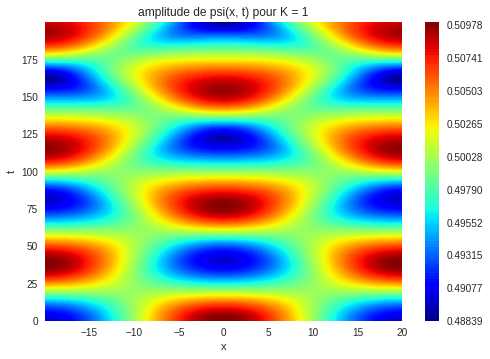

In [10]:
schrodinger(1, 0)

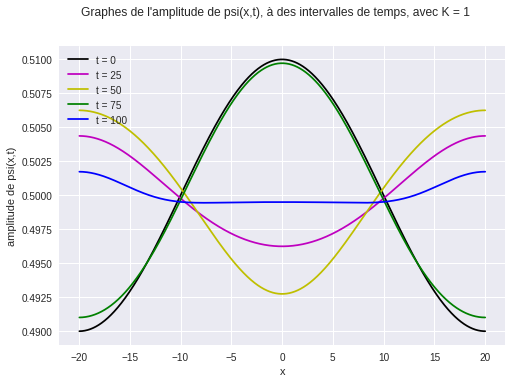

In [11]:
schrodinger(1, 1)

Il est évident qu'ici, il s'agit d'un comportement assez régulier, à une amplitude plus faible que dans la cas précédent. 

Dans le cas ou K < 0, nous avons pu observer des pics à amplitude forte très concentrés en des points précis, symétriques par rapport à x = 0. Nous comprenons pourquoi il a l'appellation de cas 'focusing'.

Dans le cas ou K > 0, nous avons pu cependant observer qu'il n'ya pas de pics localisés mais qu'il s'agit d'un comportement assez global et très régulier. Ceci comme dans le cas au dessus est symétrique par rapport à x = 0, d'ou le nom 'defocusing case'.

In [9]:
def peregrine(K, L, a = 0, Ti = 0, T = 10, N = 1024, dt = 0.01):
    temps = np.arange(-T, T+dt, dt)
    x = np.linspace(-L/2 + L/N, L/2, N+1)
    m = np.linspace(-N/2, N/2, N+1)
    p = np.zeros((len(x), len(temps)), dtype = "complex")
    p2 = copy(p)
    p[:, 0] = np.exp(1j*temps[0])*(1-(4*(1+2j*temps[0]))/(1+4*x**2+4*temps[0]**2))
    p2[:, 0] = copy(p[:, 0])
    
    for i, t in enumerate(temps[:-1]):
        g = np.exp(-1j*K*dt*np.abs(p[:, i])**2)*p[:, i]
        g_m = (1/N)*np.fft.fftshift(np.fft.fft(g))
        p_m = np.exp(dt*(-1j/2)*(2*m*np.pi/L)**2)*g_m
        p[:, i+1] = N*np.fft.ifft(np.fft.ifftshift(p_m))
        p2[:, i+1] = np.exp(1j*t)*(1-(4*(1+2j*t))/(1+4*x**2+4*t**2))
        
   
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
    fig.suptitle('Comparaison entre Peregrine exacte et simulée')
    plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.2)

    if a == 0:
        u, v = np.meshgrid(x, temps)
        c1 = np.linspace(np.min(np.min(np.abs(p))),np.max(np.max(np.abs(p))),101)
        c2 = np.linspace(np.min(np.min(np.abs(p2))),np.max(np.max(np.abs(p2))),101)
        a1 = ax1.contourf(u, v, np.abs(np.transpose(p)), c1, cmap = 'jet')
        a2 = ax2.contourf(u, v, np.abs(np.transpose(p2)), c2, cmap = 'jet')
        ax1.set(xlabel = "x", ylabel = "t")
        ax2.set(xlabel = "x", ylabel = "t")
        ax1.set_title("simulation avec Peregrine en CI")
        ax2.set_title("Peregrine")

        fig.colorbar(a2, ax=ax2)
        plt.show()
        
    if a == 1:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
        fig.suptitle("t")
        
        ax1.plot(x, np.abs(p2[:, int(Ti/dt)] - p[:, int(Ti/dt)]))
        ax1.set_title("Différence entre simulations à T = {}".format(Ti))
        
        ax2.plot(x, np.abs(p[:, int(Ti/dt)]), label = "simulée")
        ax2.plot(x, np.abs(p2[:, int(Ti/dt)]), label = "théorique")
        ax2.set_title("solution simulée et théorique pour t = {}".formmat(Ti))
        ax2.legend()
        ax2.set(xlabel = "x", ylabel = "amplitude")
        

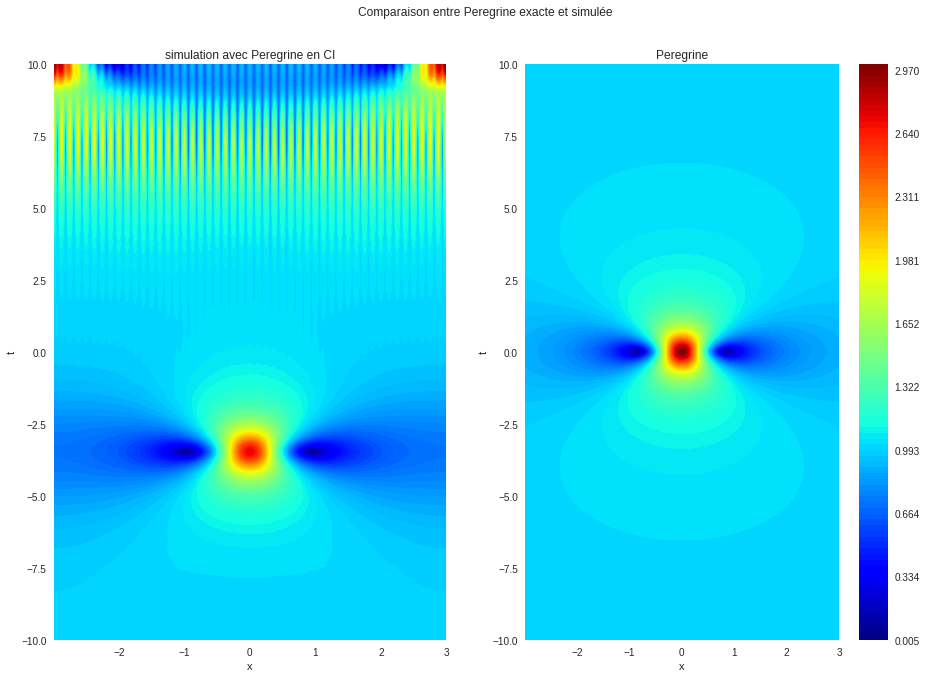

In [7]:
peregrine(-1, 6)

AttributeError: 'str' object has no attribute 'formmat'

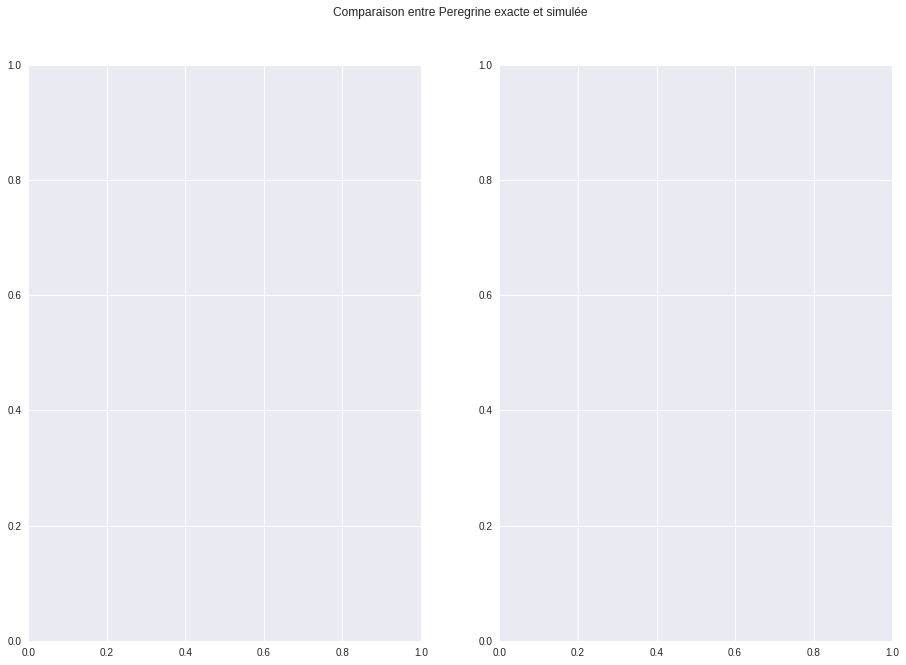

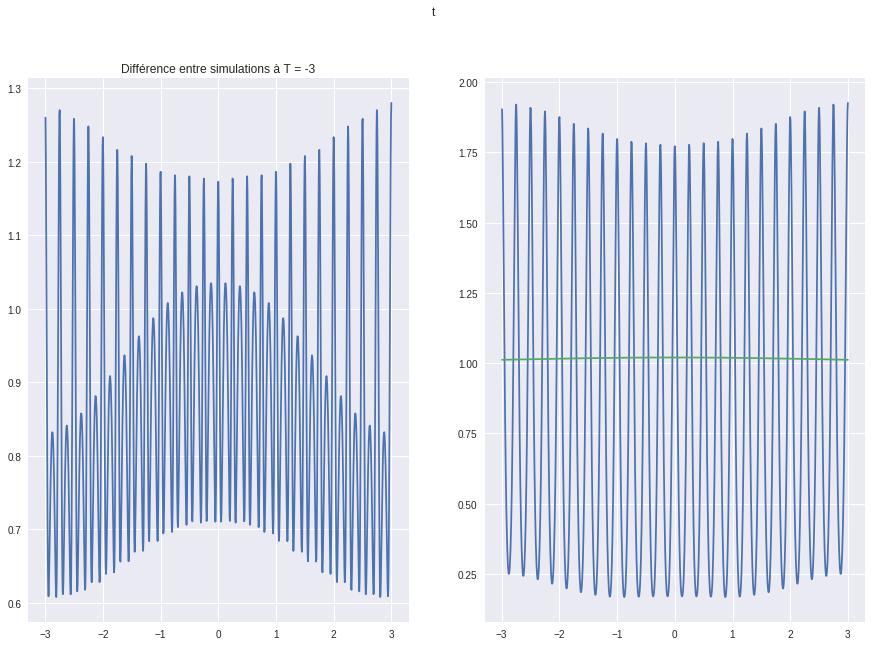

In [10]:
peregrine(-1, 6, 1, -3)